In [1]:
import layers
from source import main_gan
from source import generate_latent_points
from tensorflow.keras.datasets.mnist import load_data
from numpy import expand_dims

In [2]:
init = layers.initializer("RandomNormal", stddev=0.02)
input_shape = (28, 28, 1)
optimizer = layers.optimizer("Adam", learning_rate=0.00001, beta_1=0.5)
n_nodes = 64 * 7 * 7
latent_dim = 50

argv_discriminator = {
    "model_type": "Sequential",
    "lyrs": [
        # 28x28x512
        layers.layer("Conv2D", filters=512, kernel_size=(3, 3), padding="same", kernel_initializer=init, input_shape=input_shape),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # downsample to 14x14x256
        layers.layer("Conv2D", filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=init, input_shape=input_shape),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # 14x14x128
        layers.layer("Conv2D", filters=128, kernel_size=(3, 3), padding="same", kernel_initializer=init, input_shape=input_shape),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # downsample to 7x7x64
        layers.layer("Conv2D", filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=init),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # classifier
        layers.layer("Flatten"),
        layers.layer("Dense", units=1, activation="sigmoid")
    ],
    "optimizer": optimizer,
    "loss": "binary_crossentropy",
    "metrics": ["accuracy"]
}

argv_generator = {
    "model_type": "Sequential",
    "lyrs": [
        # foundation for 7x7x64
        layers.layer("Dense", units=n_nodes, kernel_initializer=init, input_dim=latent_dim),
        layers.layer("ReLU"),
        layers.layer("Reshape", target_shape=(7, 7, 64)),
        # upsample to 14x14x128
        layers.layer("Conv2DTranspose", filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=init),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # 14x14x256
        layers.layer("Conv2DTranspose", filters=256, kernel_size=(3, 3), padding="same", kernel_initializer=init),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # upsample to 28x28x512
        layers.layer("Conv2DTranspose", filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=init),
        layers.layer("BatchNormalization"),
        layers.layer("ReLU"),
        # output 28x28x1
        layers.layer("Conv2D", filters=1, kernel_size=(4, 4), activation="tanh", padding="same", kernel_initializer=init)
    ],
    "do_compile": False
}

argv_gan = {
    "optimizer": optimizer,
    "loss": "binary_crossentropy",
    "model_type": "Sequential"
}

argv_train = {"n_epochs": 10, "latent_dim": latent_dim, "do_print": True}

In [3]:
# load data
(train_x, train_y), (_, _) = load_data()
# expand to 3D
x = expand_dims(train_x, axis=-1)
selected_ix = train_y == 8
x = x[selected_ix]
# convert from ints to floats and scale from [0, 255] to [-1, 1]
x = x.astype("float32")
dataset = (x - 127.5) / 127.5

In [4]:
argv = [
    argv_discriminator,
    argv_generator,
    argv_gan,
    argv_train,
    dataset
]

main_gan(argv)

>1/10, d1=0.018, d2=0.015, g=0.618, a1=100.0%, a2=100.0%
>2/10, d1=0.006, d2=0.002, g=0.347, a1=100.0%, a2=100.0%
>3/10, d1=0.003, d2=0.003, g=0.079, a1=100.0%, a2=100.0%
>4/10, d1=0.003, d2=0.001, g=0.013, a1=100.0%, a2=100.0%
>5/10, d1=0.001, d2=0.001, g=0.004, a1=100.0%, a2=100.0%
>6/10, d1=0.001, d2=0.003, g=0.002, a1=100.0%, a2=100.0%
>7/10, d1=0.001, d2=0.001, g=0.001, a1=100.0%, a2=100.0%
>8/10, d1=0.001, d2=0.002, g=0.002, a1=100.0%, a2=100.0%
>9/10, d1=0.001, d2=0.002, g=0.014, a1=100.0%, a2=100.0%
>10/10, d1=0.001, d2=0.002, g=0.064, a1=100.0%, a2=100.0%


In [5]:
from tensorflow.keras.models import load_model
gan_model = load_model("generator_010.h5")
gan_sample = generate_latent_points(latent_dim, 1)
sample = gan_model(gan_sample)

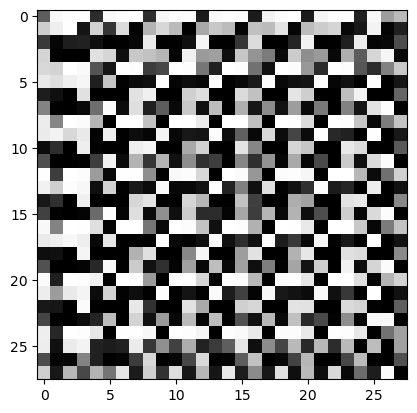

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample[0], cmap=plt.cm.binary)